In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from pipeline import *
from vehicle_detection import VehicleDetectionPipeline

In [17]:
path = './data/full/*/*/*.png'

In [46]:
p = VehicleDetectionPipeline()

In [47]:
p.preprocess_data(path=path)

preprocess_data
extract_image_paths
8792 8968
extract_features_for_images
0/8792
100/8792
200/8792
300/8792
400/8792
500/8792
600/8792
700/8792
800/8792
900/8792
1000/8792
1100/8792
1200/8792
1300/8792
1400/8792
1500/8792
1600/8792
1700/8792
1800/8792
1900/8792
2000/8792
2100/8792
2200/8792
2300/8792
2400/8792
2500/8792
2600/8792
2700/8792
2800/8792
2900/8792
3000/8792
3100/8792
3200/8792
3300/8792
3400/8792
3500/8792
3600/8792
3700/8792
3800/8792
3900/8792
4000/8792
4100/8792
4200/8792
4300/8792
4400/8792
4500/8792
4600/8792
4700/8792
4800/8792
4900/8792
5000/8792
5100/8792
5200/8792
5300/8792
5400/8792
5500/8792
5600/8792
5700/8792
5800/8792
5900/8792
6000/8792
6100/8792
6200/8792
6300/8792
6400/8792
6500/8792
6600/8792
6700/8792
6800/8792
6900/8792
7000/8792
7100/8792
7200/8792
7300/8792
7400/8792
7500/8792
7600/8792
7700/8792
7800/8792
7900/8792
8000/8792
8100/8792
8200/8792
8300/8792
8400/8792
8500/8792
8600/8792
8700/8792
extract_features_for_images
0/8968
100/8968
200/8968
300/8

In [48]:
p.train()

train
Test Accuracy of SVC =  0.978885135135


In [49]:
p.X_train.shape

(14208, 4932)

In [50]:
ip = ImageProcessor('./data/test_1.jpg')

In [51]:
ip.find_vehicles(p.classifier, p.scaler)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/imgwarp.cpp:3492: error: (-215) ssize.width > 0 && ssize.height > 0 in function resize


In [14]:
ip.add_heat()

In [15]:
ip.apply_threshold(1)

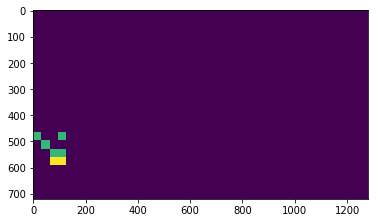

In [16]:
plt.imshow(ip.heat)
plt.show()

In [23]:
from scipy.ndimage.measurements import label

In [24]:
labels = label(ip.heat)
print(labels[1], 'cars found')
plt.imshow(labels[0], cmap='gray')

2 cars found


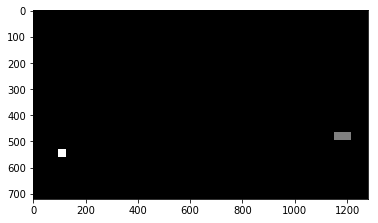

In [25]:
plt.show()

In [146]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [147]:
# Read in the last image above
image = mpimg.imread('./data/test_1.jpg')
# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image), labels)
# Display the image
plt.imshow(draw_img)

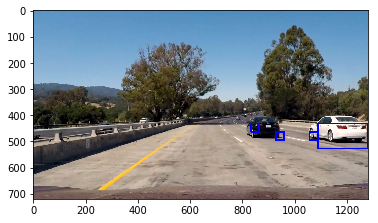

In [148]:
plt.show()